# Applying K-means clustering from scratch for image compression

In [2]:
#pip install imageio

   ---------------------------------------- 0.0/313.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/313.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/313.4 kB ? eta -:--:--
   ---------- ---------------------------- 81.9/313.4 kB 919.0 kB/s eta 0:00:01
   ---------------------------------------- 313.4/313.4 kB 2.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
## Input i

In [1]:
import numpy as np
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt
import time
import imageio

import sys

In [11]:
from PIL import Image
image_path = "hestain.bmp"
image = Image.open(image_path)

# Display the image
image.show()

In [5]:
# ## select the target image
raw_img = imageio.imread('hestain.bmp')
#raw_img = imageio.imread('football.bmp')

raw_img[:2, :3] #row=pixel and column=3 columns (red, green & blue components between 0 & 255)

C:\Users\stuti\AppData\Local\Temp\ipykernel_11992\4219406853.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  raw_img = imageio.imread('hestain.bmp')


array([[[158,  93, 223],
        [159,  94, 224],
        [148,  85, 215]],

       [[178, 115, 246],
        [180, 119, 248],
        [171, 110, 240]]], dtype=uint8)

In [6]:
# ### select the distance measure
dist_choice = 'euclidean'  # L2 norm
#dist_choice = 'cityblock'   # L1 norm

# ### select initialization strategy: random vs poor
init_method = 'random'
#init_method = 'poor'

In [7]:
def myKmeans(raw, k, ct_init, dist_choice):
    
    ct_old = ct_init
    
    n1,n2,n3 = np.shape(raw)
    raw = np.reshape(raw,(-1, 3))
    
    data = raw.astype('double')
    dim = np.shape(data)[1]
    
        
    ct_new = np.full((k,dim), np.nan)
    
    # Looping parameter
    maxIter = 500
    nIter = 1
    cost_old = 1e10
    cost_list = []
    
    while (nIter <=maxIter):
    
        # find the distances of all data points to each centroid
        dist_mtx = cdist(data, ct_old, dist_choice)
        
        current_cost = 0
        
        # find the cluster assignment for each data point
        cl = np.argmin(dist_mtx, axis=1)
        
        # update the centroid for each group
        for jj in range(k):
                        
            # find the index of data points in cluster ii
            idx_j = np.where(cl==jj)
            x_j = data[idx_j]
            
            if dist_choice == 'euclidean':
                ct_new[jj] = np.mean(x_j, axis=0)
            elif dist_choice == 'cityblock':
                ct_new[jj] = np.median(x_j, axis=0)
            else:
                sys.exit('please specify the correct distance')
            
            if ~np.isfinite(sum(ct_new[jj])):
                ct_new[jj] = np.full(np.shape(ct_new[jj]), fill_value = np.inf)      
            new_dist_mtx = cdist(x_j, ct_new[jj].reshape(1,3), dist_choice)
            current_cost = current_cost + np.sum(new_dist_mtx) 
        
        # save the cost of current iteration to for record
        cost_list.append(current_cost)
        
        # check converge
        if current_cost == cost_old:
            break
        
        # update the variable for next iteration
        cost_old = current_cost
        ct_old = ct_new
        nIter = nIter+1
    
    # assign the new pixel value with new centroid
    dist_all = cdist(raw, ct_new, dist_choice)
    cl_all = np.argmin(dist_all, axis=1)
    
    # prepare to output the result
    img = np.full(np.shape(raw), fill_value = np.nan)
    for ii in np.unique(cl_all):
        img[np.where(cl_all == ii)] = ct_new[ii]/255
    
    img_out = np.reshape(img,(n1,n2,n3))
    
    # check empty cluster:
    n_empty = sum(1 - np.isfinite( np.sum(ct_new, axis=1) ))
    # print('number of iterations '+str(nIter))
    
    return img_out, n_empty, nIter, cost_list[-1]


C:\Users\stuti\.conda\envs\unstruct\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\stuti\.conda\envs\unstruct\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



Kmeans result for euclidean, current random seed: 6
the running time for each k
k = 2:   
0.21sec.    # of empty cluster: 0     nIteration: 27     cost: 2969613.222544301
k = 3:   
0.28sec.    # of empty cluster: 0     nIteration: 46     cost: 2317081.8104028064
k = 4:   
0.56sec.    # of empty cluster: 0     nIteration: 70     cost: 2016375.578944317
k = 5:   
0.19sec.    # of empty cluster: 0     nIteration: 29     cost: 1781359.540601786
k = 6:   
0.39sec.    # of empty cluster: 0     nIteration: 49     cost: 1635233.3482491272
k = 8:   
0.47sec.    # of empty cluster: 2     nIteration: 45     cost: 1621148.526406292
k = 16:   
0.60sec.    # of empty cluster: 9     nIteration: 43     cost: 1486578.2976728745
k = 24:   
0.80sec.    # of empty cluster: 15     nIteration: 44     cost: 1309401.437694781
k = 32:   
2.30sec.    # of empty cluster: 20     nIteration: 107     cost: 1140767.708010899


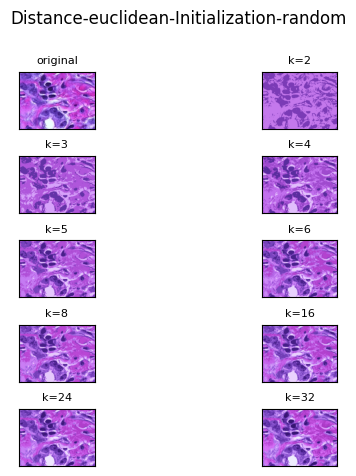

In [8]:
k_mesh = [2,3,4,5,6,8,16,24, 32]
run_time = []
n_empty_all = []

fig, ax = plt.subplots(5,2)
ax[0,0].imshow(raw_img)
ax[0,0].set_title('original', fontsize = 8)
ax[0,0].get_xaxis().set_visible(False)
ax[0,0].get_yaxis().set_visible(False)


'''
 set random seed for reproducibility
 different will lead different initialization, thus different final result
 
'''
rseed = 6


nIter_all= [] # save total iterations for each K
cost_all = [] # save cost for each k

for ii in range(len(k_mesh)):
    startt = time.time()
    
    # initialization would affect the result
    np.random.seed(rseed)
    
    # set the initialization within a certain range to reduce the chance of bad initialization
    if init_method == 'random':
        ct_init = np.random.random((k_mesh[ii],3))*255
    elif init_method == 'poor':
        ct_init = np.random.random((k_mesh[ii],3))
    else:
        sys.exit('please specify either random or poor')
    
    img, n_empty, nIter, cost = myKmeans(raw_img, k_mesh[ii], ct_init, dist_choice)
    endt = time.time()
    
    nIter_all.append(nIter)
    cost_all.append(cost)
    
    img = (img*255).astype('int')
    
    ax[int((ii+1)/2), np.remainder(ii+1,2)].imshow(img)
    ax[int((ii+1)/2), np.remainder(ii+1,2)].set_title('k='+str(k_mesh[ii]), fontsize = 8)
    ax[int((ii+1)/2), np.remainder(ii+1,2)].get_xaxis().set_visible(False)
    ax[int((ii+1)/2), np.remainder(ii+1,2)].get_yaxis().set_visible(False)
    
    run_time.append(endt - startt)
    n_empty_all.append(n_empty)
    
fig.tight_layout(pad=1.0)
fig.suptitle('Distance-{}-Initialization-{}'.format(dist_choice, init_method))
fig.subplots_adjust(top=0.85)

savename = 'Distance-{}-Initialization-{}.pdf'.format(dist_choice, init_method)
plt.savefig(savename, dpi = 300)

print('\nKmeans result for {}, current random seed: {}'.format(dist_choice,str(rseed)))
print('the running time for each k')
for kk in range(9):
    print('k = '+str(k_mesh[kk])+':   \n'+'%.2f'%run_time[kk]+
          'sec.    # of empty cluster: '+ str(n_empty_all[kk]) + 
                                             '     nIteration: '+str(nIter_all[kk]) + '     cost: '+str(cost_all[kk]))




## Cost column shown here represents the total within cluster sum of squares. Based on which, seems like the best k value is likely between 6-8 clusters at which the marginal decrease in the distortion cost as k increases becomes small enough not to merit a larger k.